# SpaceShip Titanic Kaggle
 Welcome to my project involving the SpaceShip Titanic Kaggle competition dataset! This captivating challenge leads us to explore an intriguing scenario: following the spacecraft's collision with an anomaly, our objective is to employ machine learning techniques to determine which passengers were transported to another dimension. The significant challenge lies in making this prediction solely based on the data provided by the competition.


 - **Objective: Generate data indicating which passengers were transported.**

---

In [49]:
#Importing libraries
#Python Version 3.11.5
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("Database/train.csv") # Importing database train.csv
df_test = pd.read_csv("Database/test.csv") # Importing database train.csv

In [3]:
df_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


# Variables

- **PassengerId:** A unique ID for each passenger. Each ID takes the form gggg_pp where gggg indicates a group the passenger is traveling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet:** The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep:** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin:** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination:** The planet the passenger will be debarking to.

- **Age:** The age of the passenger.

- **VIP:** Whether the passenger has paid for special VIP service during the voyage.

- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name:** The first and last names of the passenger.

- **Transported:** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
predict.


# Exploratory Data Analysis (EDA)

In [5]:
df_train.shape

(8693, 14)

In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Axes: >

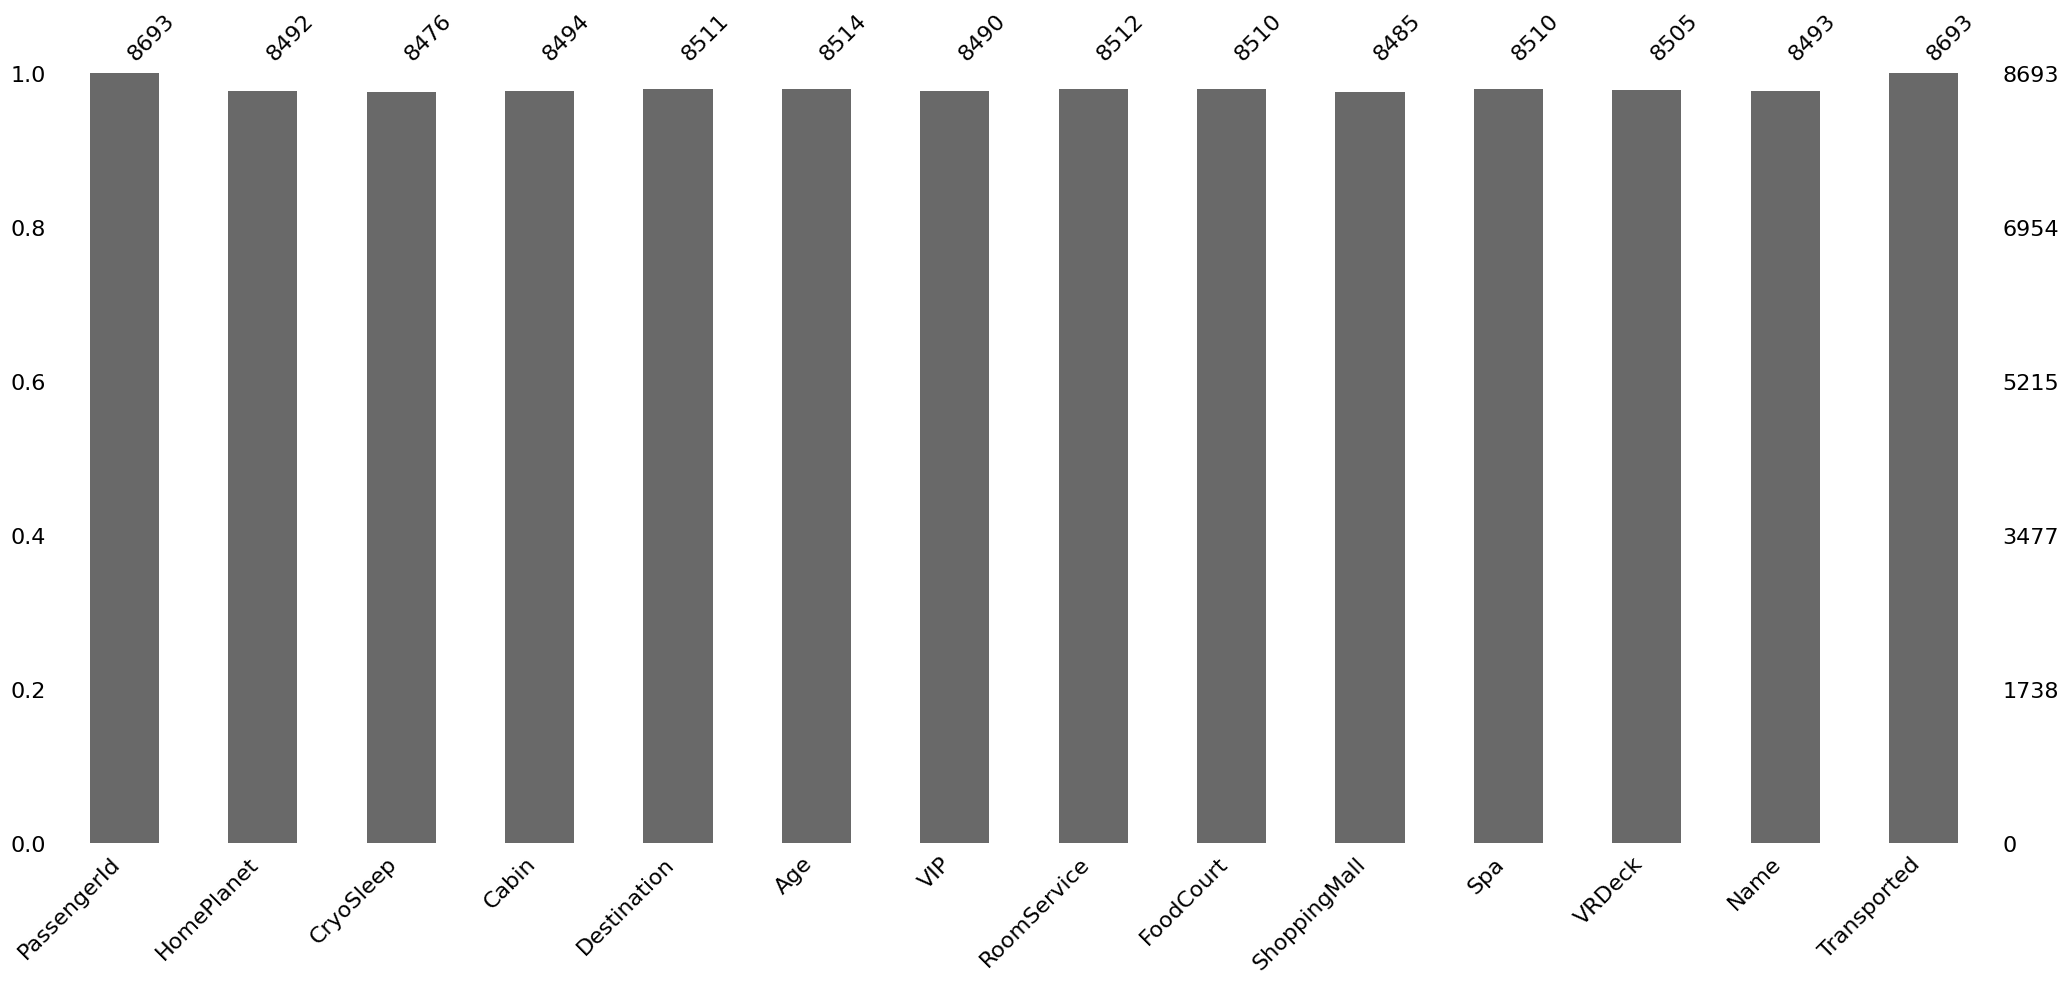

In [9]:
msno.bar(df_train)

<Axes: >

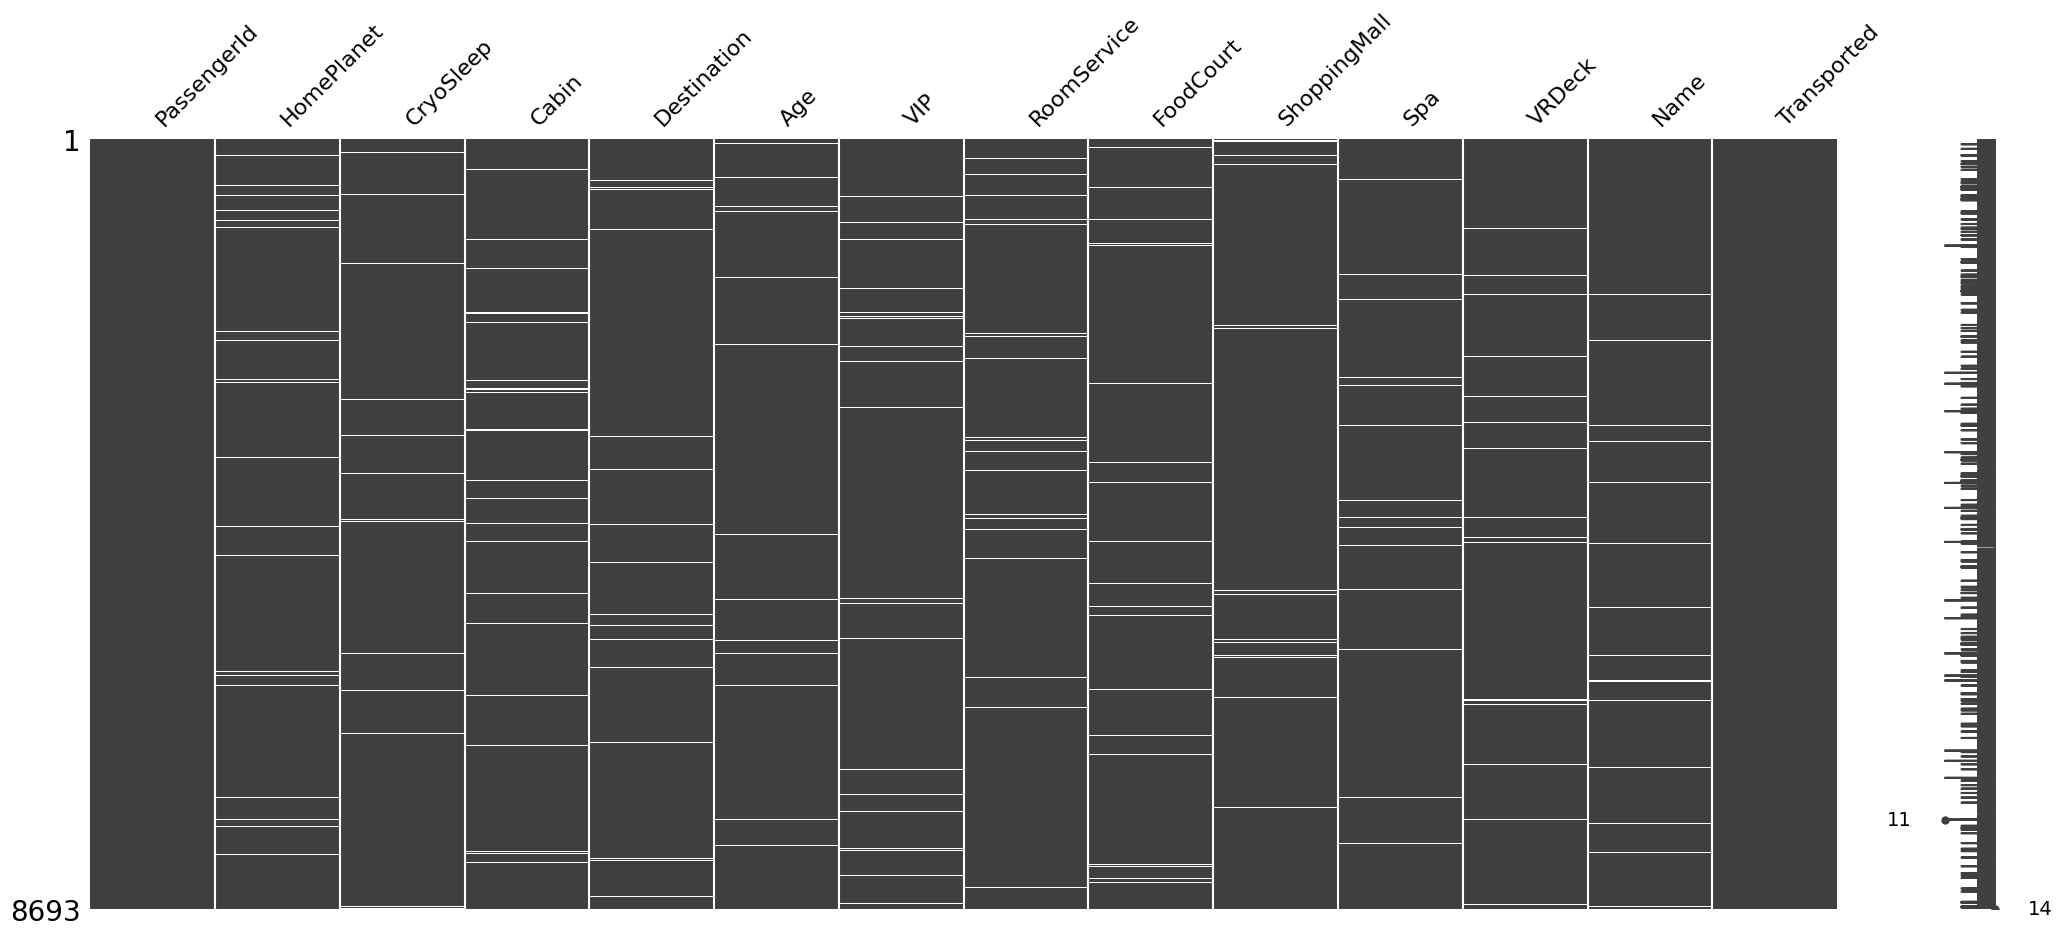

In [10]:
msno.matrix(df_train)

In [11]:
df_train.shape

(8693, 14)

In [12]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Categorical Analysis

In [13]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [14]:
df_train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [15]:
df_train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [16]:
df_train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [17]:
df_train.groupby('Transported')['HomePlanet'].value_counts().to_frame()

count
Transported HomePlanet       
False       Earth        2651
            Mars          839
            Europa        727
True        Earth        1951
            Europa       1404
            Mars          920

In [18]:
df_train.groupby('Transported')['Destination'].value_counts().to_frame()

count
Transported Destination         
False       TRAPPIST-1e     3128
            55 Cancri e      702
            PSO J318.5-22    395
True        TRAPPIST-1e     2787
            55 Cancri e     1098
            PSO J318.5-22    401

In [19]:
df_train.groupby('Transported')['CryoSleep'].value_counts().to_frame()

count
Transported CryoSleep       
False       False       3650
            True         554
True        True        2483
            False       1789

In [20]:
df_train.groupby('Transported')['VIP'].value_counts().to_frame()

count
Transported VIP         
False       False   4093
            True     123
True        False   4198
            True      76

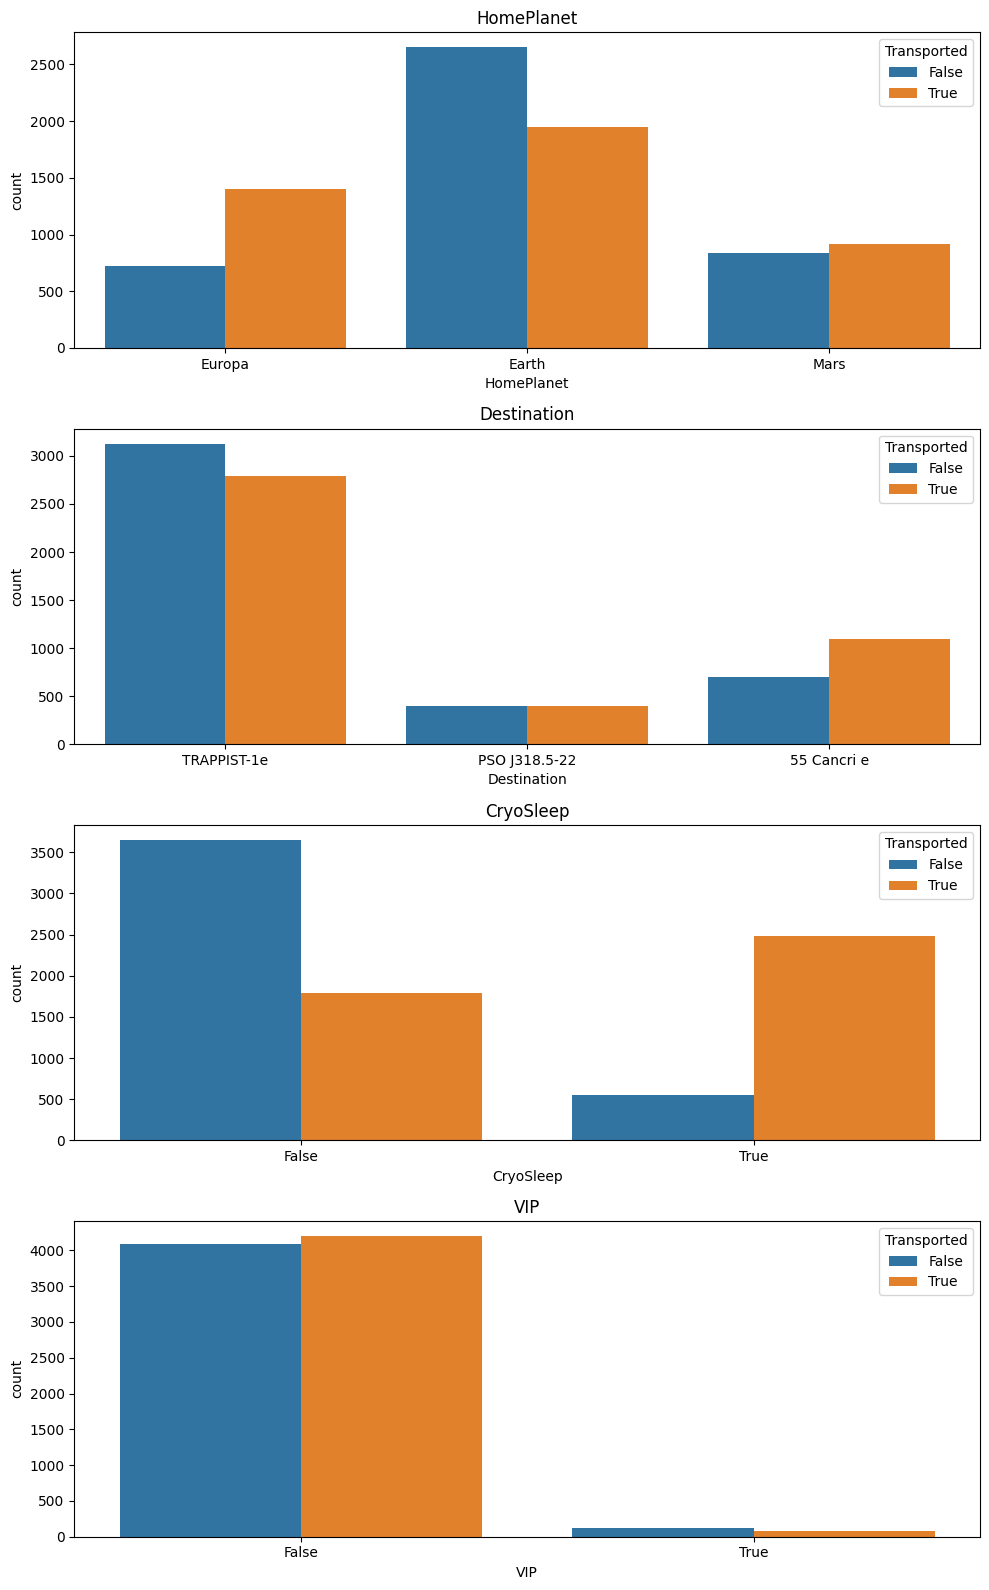

In [21]:
cat_feats=['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

**Insights:**

 - It is noted that the majority of the crew members from the planet Europa have been transported. - 
The majority of the transportes were in CryoSleep

---





### Continuous Analysis

Text(0.5, 1.0, 'Age Distribuiton')

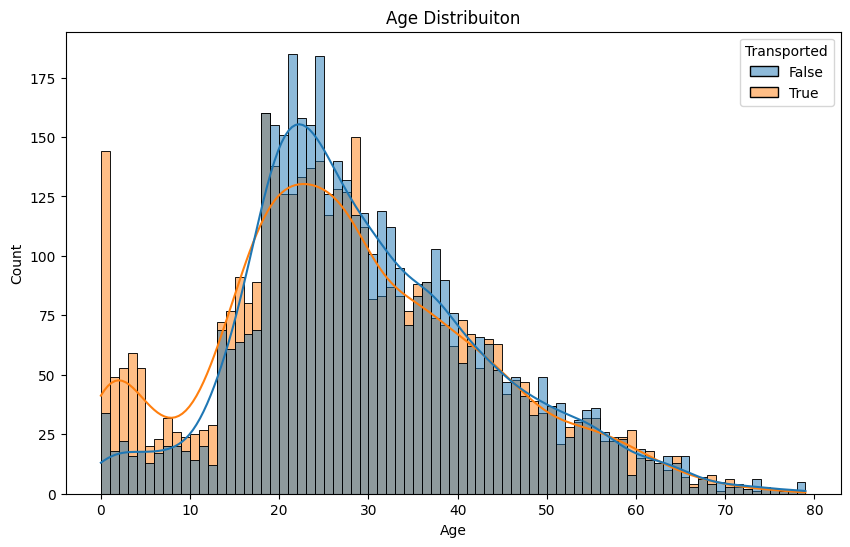

In [22]:
plt.figure(figsize=(10,6))


sns.histplot(df_train, x='Age', hue='Transported', kde=True, binwidth=1)
plt.title('Age Distribuiton')

**Insights:**

- *0-20:* There are higher chances of being transported.
- *20-30:* The likelihood of being transported decreases.
- *30 and above:* The chances level off.


(0.0, 100.0)

<Figure size 1000x600 with 0 Axes>

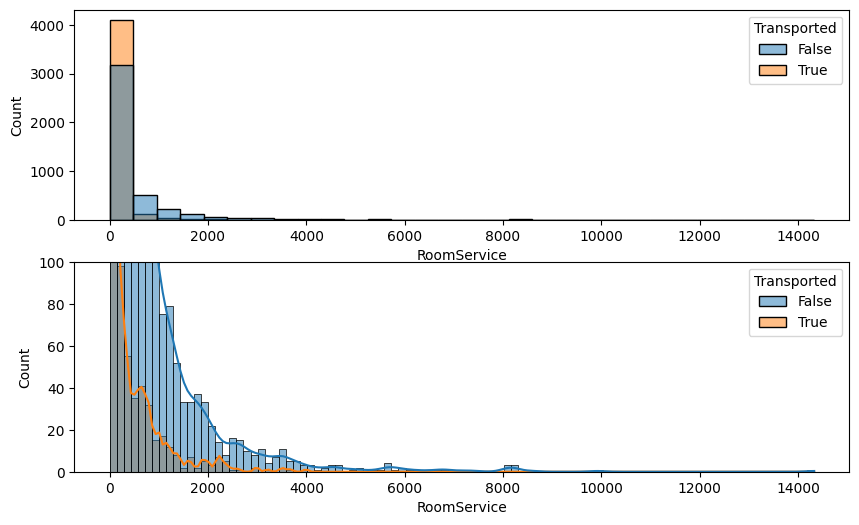

In [23]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
sns.histplot(data=df_train, x='RoomService', ax =ax1, bins=30, kde=False, hue='Transported')
sns.histplot(data=df_train, x='RoomService', ax =ax2, bins = 100, kde=True, hue='Transported')
plt.ylim([0,100])

(0.0, 100.0)

<Figure size 1000x600 with 0 Axes>

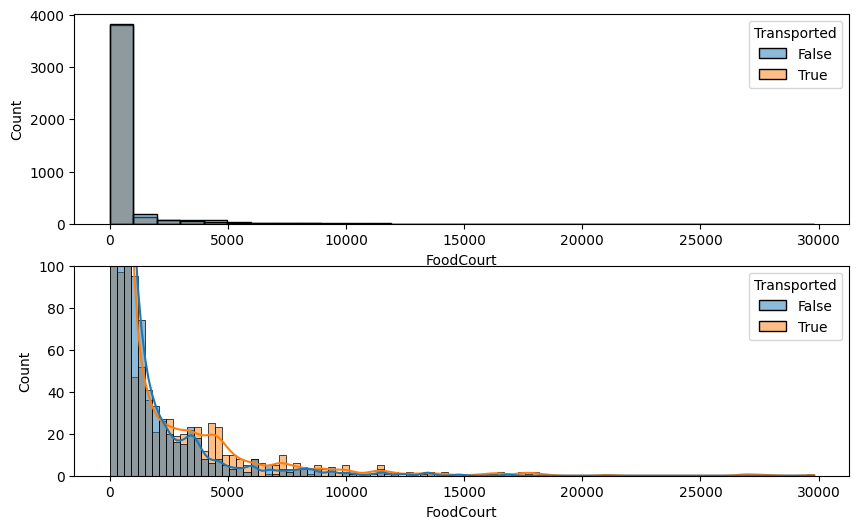

In [24]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
sns.histplot(data=df_train, x='FoodCourt', ax =ax1, bins=30, kde=False, hue='Transported')
sns.histplot(data=df_train, x='FoodCourt', ax =ax2, bins = 100, kde=True, hue='Transported')
plt.ylim([0,100])

(0.0, 200.0)

<Figure size 1000x600 with 0 Axes>

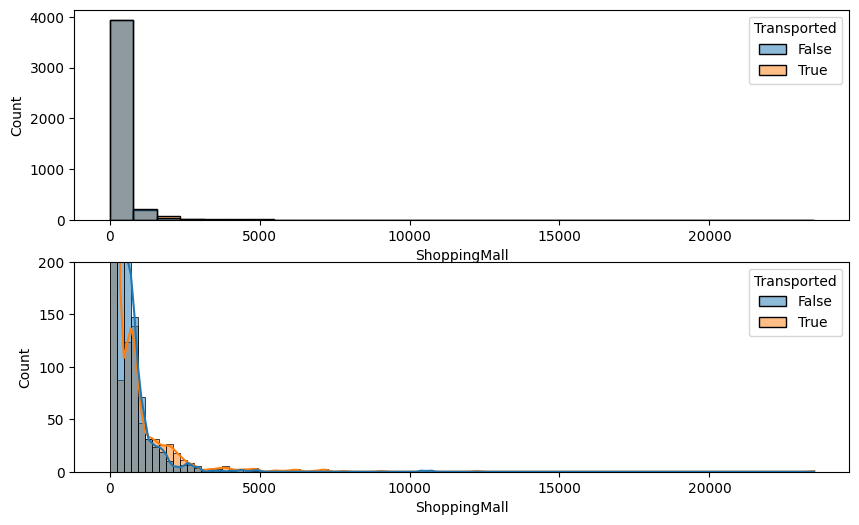

In [25]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
sns.histplot(data=df_train, x='ShoppingMall', ax =ax1, bins=30, kde=False, hue='Transported')
sns.histplot(data=df_train, x='ShoppingMall', ax =ax2, bins = 100, kde=True, hue='Transported')

plt.ylim([0,200])

(0.0, 200.0)

<Figure size 1000x600 with 0 Axes>

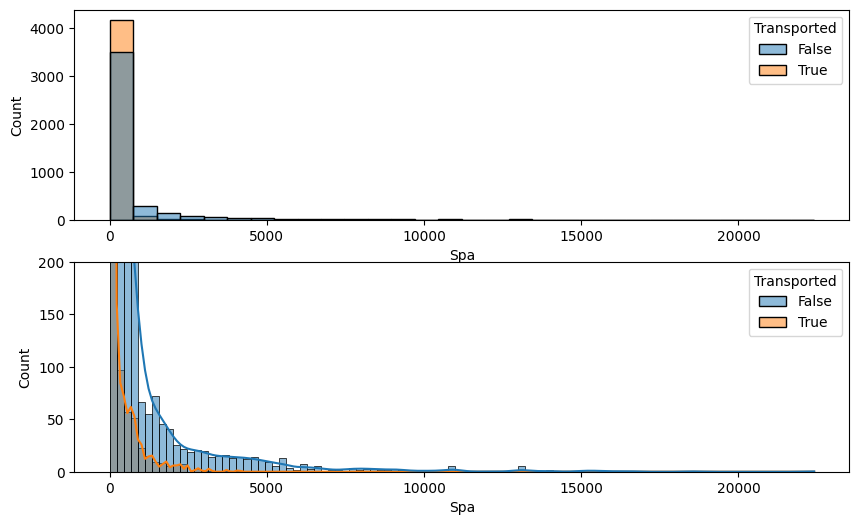

In [26]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
sns.histplot(data=df_train, x='Spa', ax =ax1, bins=30, kde=False, hue='Transported')
sns.histplot(data=df_train, x='Spa', ax =ax2, bins = 100, kde=True, hue='Transported')

plt.ylim([0,200])

(0.0, 200.0)

<Figure size 1000x600 with 0 Axes>

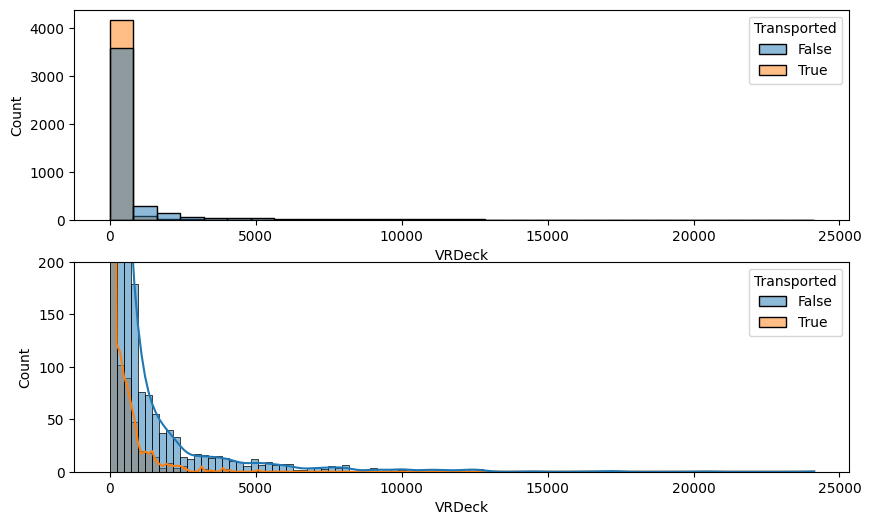

In [27]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
sns.histplot(data=df_train, x='VRDeck', ax =ax1, bins=30, kde=False, hue='Transported')
sns.histplot(data=df_train, x='VRDeck', ax =ax2, bins = 100, kde=True, hue='Transported')

plt.ylim([0,200])

# Missing Values

In [28]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [29]:
missing_train = missing_values_table(df_train)

Your selected dataframe has 14 columns.
There are 12 columns that have missing values.


In [30]:
missing_train

,Missing Values,% of Total Values
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


In [31]:
test_missing= missing_values_table(df_test)
test_missing

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
FoodCourt,106,2.5
Spa,101,2.4
Cabin,100,2.3
ShoppingMall,98,2.3
Name,94,2.2
CryoSleep,93,2.2
VIP,93,2.2
Destination,92,2.2
Age,91,2.1
HomePlanet,87,2.0


## Treating Missing values
### Countinuos Variables

In [32]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="constant")
imputer.fit(df_train[imputer_cols])
df_train[imputer_cols] = imputer.transform(df_train[imputer_cols])
df_test[imputer_cols] = imputer.transform(df_test[imputer_cols])

In [33]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

### Categorical Variables

In [34]:
df_train["HomePlanet"].fillna('Z', inplace=True)
df_test["HomePlanet"].fillna('Z', inplace=True)

df_train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
df_test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)

In [37]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [38]:
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return df_train, df_test

df_train ,df_test = label_encoder(df_train,df_test ,label_cols)

In [39]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Data Processing

In [45]:
df_train["Transported"] = df_train["Transported"].replace({True: 1, False : 0})

In [47]:
df_train["Transported"].head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [48]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

## Data Modeling

In [52]:
clf = RandomForestClassifier(max_depth=10, random_state=123)

In [54]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [57]:
print("score on test: " + str(clf.score(X_val, y_val)))
print("score on train: "+ str(clf.score(X_train, y_train)))

score on test: 0.8012879484820608
score on train: 0.8610216290842154


In [59]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [60]:
submission = clf.predict(df_test)

In [61]:
submission

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
passengers=df_test['PassengerId']

final_sub=pd.DataFrame(data=(passengers),columns=['PassengerId'])
final_sub.loc[:,"Transported"]=submission.astype('bool')

In [65]:
final_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [70]:
final_sub.to_csv('submission.csv',index=False)